In [1]:
import pyslammer as slam
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
histories = slam.sample_ground_motions()
ky = 0.15
motion = histories["Northridge_VSP-360"]
motion = histories["Chi-Chi_1999_TCU068-090"]
dt = motion[0][1] - motion[0][0]
input_acc = motion[1] / 9.80665
da = slam.Decoupled(k_y=ky,
                    a_in=input_acc,
                    dt=dt,
                    height=50.0,
                    vs_slope=600.0,
                    vs_base=600.0,
                    damp_ratio=0.05,
                    ref_strain=0.0005,
                    soil_model="linear_elastic",
                    si_units=True,
                    lite=False)


da.run_sliding_analysis()
pga = max(abs(input_acc))


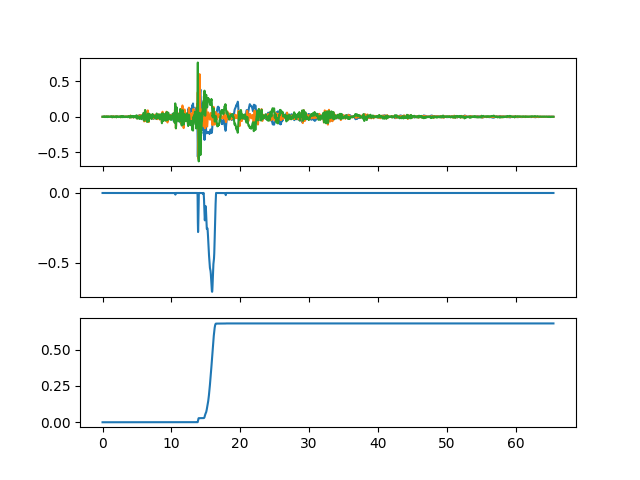

In [3]:
fig, ax = plt.subplots(3,1,sharex=True)
ax[0].plot(motion[0],-da.a_in)
ax[0].plot(motion[0],da.a_resp/9.81)
ax[0].plot(motion[0],da.HEA/9.81)
ax[1].plot(motion[0],da.block_vel)
ax[2].plot(motion[0],da.block_disp)

In [4]:
motion[0]

array([0.0000e+00, 5.0000e-03, 1.0000e-02, ..., 6.5495e+01, 6.5500e+01,
       6.5505e+01])

In [5]:
sorted_histories = sorted(histories.keys())

Cape_Mendocino_1992_PET-090: PGA = 0.21, decoupled disp = 2.00cm
Chi-Chi_1999_TCU068-090: PGA = 0.57, decoupled disp = 67.98cm
Coalinga_1983_PVB-045: PGA = 0.38, decoupled disp = 8.59cm
Duzce_1999_375-090: PGA = 0.51, decoupled disp = 21.12cm
Imperial_Valley_1979_BCR-230: PGA = 0.77, decoupled disp = 52.16cm
Kobe_1995_TAK-090: PGA = 0.62, decoupled disp = 123.75cm
Kocaeli_1999_ATS-090: PGA = 0.18, decoupled disp = 0.83cm
Landers_1992_LCN-345: PGA = 0.79, decoupled disp = 43.93cm
Loma_Prieta_1989_HSP-000: PGA = 0.37, decoupled disp = 6.55cm
Mammoth_Lakes-1_1980_CVK-090: PGA = 0.42, decoupled disp = 19.40cm
Mammoth_Lakes-2_1980_CVK-090: PGA = 0.27, decoupled disp = 1.41cm
Morgan_Hill_1984_CYC-285: PGA = 1.30, decoupled disp = 40.29cm
N_Palm_Springs_1986_WWT-180: PGA = 0.49, decoupled disp = 17.58cm
Nahanni_1985_NS1-280: PGA = 1.10, decoupled disp = 34.76cm
Nisqually_2001_UNR-058: PGA = 0.27, decoupled disp = 8.50cm
Northridge_VSP-360: PGA = 0.93, decoupled disp = 75.01cm


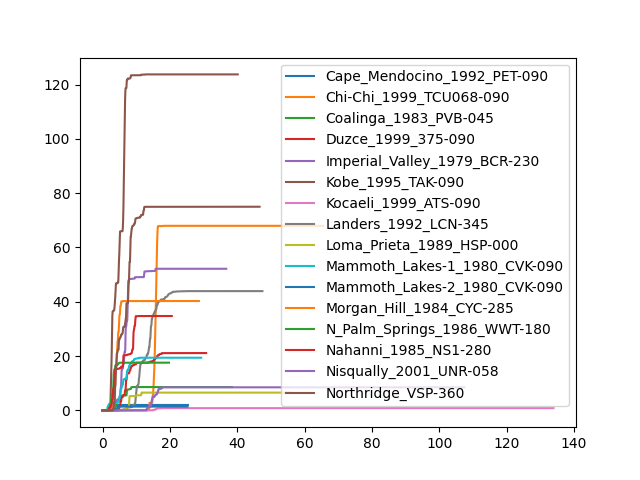

In [6]:
# %%time
fig, ax = plt.subplots()
for name in sorted_histories:
    motion = histories[name]
    dt = motion[0][1] - motion[0][0]
    input_acc = motion[1] / 9.80665
    da = slam.Decoupled(k_y=ky,
                        a_in=input_acc,
                        dt=dt,
                        height=50.0,
                        vs_slope=600.0,
                        vs_base=600.0,
                        damp_ratio=0.05,
                        ref_strain=0.0005,
                        soil_model="linear_elastic",
                        si_units=True,
                        lite=False)
    da.run_sliding_analysis()
    pga = max(abs(input_acc))
    print(f"{name}: PGA = {pga:.2f}, decoupled disp = {da.block_disp[-1] * 100:.2f}cm")
    ax.plot(motion[0],da.block_disp*100,label=name)
ax.legend()

In [7]:
# plt.close("all")
# # plt.plot(motion[0],motion[1])
# # plt.plot(motion[0],da.a_resp)
# # plt.plot(motion[0],da.HEA)
# # # plt.plot(motion[0],da.block_vel)
# plt.plot(motion[0],da.block_disp)
# plt.title(f"Total displacement: {da.block_disp[-1]*100:.1f}cm")
# 
# plt.show()